<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/May4_2021_Bhavneesh_Copy_of_Anvil_ILD_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Save Trained Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
from tensorflow import keras
#import other necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, preprocess_input
import PIL

model_filepath= "/content/drive/MyDrive/ILD_3 classes_May_2021/trained_model_split_folders/"
model = keras.models.load_model(model_filepath)

In [ ]:
print(tensorflow.__version__)

2.4.1


In [ ]:
#Check model is loaded correctly
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
#Image labels 

ild_labels = pd.read_csv('/content/drive/MyDrive/ILD_3 classes_May_2021/ILD_labels.csv')

In [ ]:
ild_labels.head()

,Class,class_code
0,Healthy,0
1,Nonspecific interstitial pneumonia,1
2,Pulmonary fibrosis,2


In [ ]:
ild_labels_array = ild_labels.to_numpy()
ild_labels_array

array([['Healthy', 0],
       ['Nonspecific interstitial pneumonia', 1],
       ['Pulmonary fibrosis', 2]], dtype=object)

Top 3 predicted classes (ranked in descending order of probability):
['Healthy' 0] (1.0)
['Pulmonary fibrosis' 2] (0.0)
['Nonspecific interstitial pneumonia' 1] (0.0)


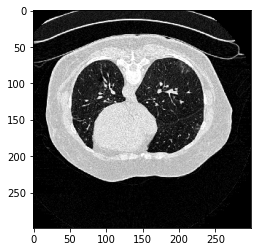

In [ ]:
#Test image preprocessing and prediction function

def test_image_predict(img):
  img = image.load_img(img, target_size=(299, 299))
  img_orig = image.img_to_array(img)
  predictions = model.predict(preprocess_input(np.expand_dims(img_orig.copy(), axis=0)))
  top_preds = np.argsort(-predictions)
  top_3 = np.argsort(predictions[0])[:-4:-1]
  print("\033[1m" + "Top 3 predicted classes (ranked in descending order of probability):" + "\033[0m")
  for i in range(3):
    print("{}".format(ild_labels_array[top_3[i]])+" ({:.3})".format(predictions[0][top_3[i]]))
  plt.imshow(img);
  return img

img = ('/content/drive/MyDrive/ILD_3 classes_May_2021/Split_Tiff_unsegmented_folders/test/healthy/img122.tif')

img = test_image_predict(img)

#correct prediction

Top 3 predicted classes (ranked in descending order of probability):
['Nonspecific interstitial pneumonia' 1] (1.0)
['Pulmonary fibrosis' 2] (0.0)
['Healthy' 0] (0.0)


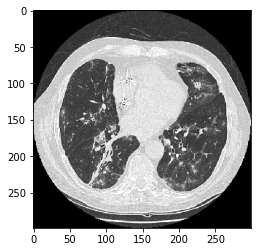

In [ ]:
img = ('/content/drive/MyDrive/ILD_3 classes_May_2021/Split_Tiff_unsegmented_folders/test/nonspecific_interstitial_pneumonia/img24.tif')
img = test_image_predict(img)

#correct prediction

Top 3 predicted classes (ranked in descending order of probability):
['Pulmonary fibrosis' 2] (1.0)
['Nonspecific interstitial pneumonia' 1] (0.0)
['Healthy' 0] (0.0)


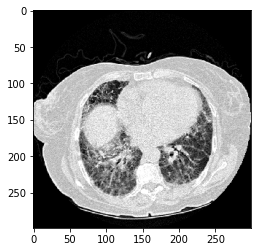

In [ ]:
img = ('/content/drive/MyDrive/ILD_3 classes_May_2021/Split_Tiff_unsegmented_folders/test/pulmonary_fibrosis/img123.tif')
img = test_image_predict(img)

#correct prediction

# Anvil Application Below

In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45216 sha256=c956dbe062dddd186b92a9bd3d1ae72419f0e57deffa330b69151f5e13c356ff
  Stored in directory: /root/.cache/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("GZBZI6HM7DJ66YJMPQJDYE6P-FD4L6M65F5D2RFIF")

#Above is the new code for the Anvil uplink app that I created today. 

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [ ]:
import anvil.media



@anvil.server.callable
def classify_image(file):
  with anvil.media.TempFile(file) as filename:
    img = load_img(filename)
  img = img.resize((299, 299))
  arr = img_to_array(img)

  prediction = model.predict(preprocess_input(np.expand_dims(arr.copy(), axis=0)))
  score = np.argmax(prediction)
  plt.imshow(img);
  if score == 2:
    return ("Pulmonary fibrosis", float(score))
  elif score == 1:
    return ("Nonspecific interstitial pneumonitis", float(score))
  else:
    return ("Healthy", float(score))

anvil.server.wait_forever()


  







In [ ]:
#Anvil app URL is given below

In [ ]:
#https://FD4L6M65F5D2RFIF.anvil.app/KW6SOWZ3TQEPBJCN2EI5MHAD